In [0]:
#Bonjour, world!
#This is a simple mobile that uses a light deep neural net (MobileNet) that has
#been trained on the ImageNet dataset.

%reload_ext autoreload
%autoreload 2
%matplotlib inline
#Useful notebook convention to align plots and auto reload changes to libraries

In [0]:
#Downloading Tensorflow 2.0
!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

#Importing our math and dataframe libraries
import numpy as np
import pandas as pd

#Importing our plotting library to plot pictures
import matplotlib.pyplot as plt

#Python imaging library to open and manipulate images
import PIL

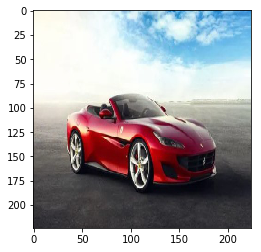

In [34]:
#Opening the image
image = PIL.Image.open('CarFerrari.jpg')
image = image.resize((224,224)) #MobileNet only accepts 224x224 images
image = np.array(image) #Convert the image into a 2D array 
imageshow = plt.imshow(image)

In [0]:
#Downloading the model usingg the Keras API
model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = 'imagenet')
#Include_top = True is download the top part of the network, this will help correctly classify the image
#Specifying the weights of the network from when it was trained on the imagenet dataset

In [21]:
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
#This command puts our image into the mobilenet acceptable format. It scales the pixel range between -1 and 1 from
#normal standard of 0 to 255 for jpg images
print(image.shape)

(224, 224, 3)


In [22]:
image = image[tf.newaxis,:,:]
#Batching our images (although there is only 1 image in this case), 
#also seperated are image into. This also a required step to pass the image
#into the MobileNet model
#3 colour channels (Red, Green, Blue)
print(image.shape)

(1, 224, 224, 3)


In [0]:
predictions = model.predict(image)
#Predicting the classification of the image using MobileNet trained on the
#ImageNet dataset

In [0]:
#Get the top 5 predictions of what the image is
top5 = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)[0]
#This will decode the numerical output from mobilenetV2 and return the category
#of what the image is or likely is
#It is returned as nested tuples in an array, hence the [0]

In [29]:
#What are the predicted cateogries for the picture of the car according to mobilenet?
for num, name, score in top5:
  print(num, name, score*100) #putting the score into a percentage value

n03100240 convertible 67.61122941970825
n04285008 sports_car 30.721810460090637
n03459775 grille 0.24890955537557602
n04037443 racer 0.16682804562151432
n02974003 car_wheel 0.13085376704111695


Now if you remember, our original image was of a covertable Ferrari. So a 67% chance of it being a covertable and a 30% change thats its a sports care isn't bad. But it is clear that this image confused MobileNet since it couldn't classify as one or the other or as both. Which means it could just be due to the images in ImageNet does not contain a hybrid category of sports car covertibles.

In [0]:
#Let's now convert the above into a functions and quickly predict another image
def ClassifyImage(Image):
  image = PIL.Image.open(Image)
  image = image.resize((224,224)) #MobileNet only accepts 224x224 images
  image = np.array(image) #Convert the image into a 2D array 
  imageshow = plt.imshow(image)
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  #Comments are above, going to skip copying the comments here
  image = image[tf.newaxis,:,:]
  
  predictions = model.predict(image)
  
  top5 = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)[0]
  
  
  for num, name, score in top5:
    print(num, name, score*100)
  return
  
  
  

n04037443 racer 52.72297263145447
n04285008 sports_car 18.49689930677414
n02974003 car_wheel 6.745161861181259
n03459775 grille 2.805659733712673
n03895866 passenger_car 1.6010167077183723


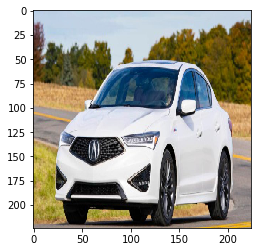

In [38]:
ClassifyImage('Car.jpg')


n01877812 wallaby 88.8753354549408
n02497673 Madagascar_cat 1.4058887958526611
n02012849 crane 1.2091782875359058
n02091134 whippet 0.6333538331091404
n02423022 gazelle 0.41310256347060204


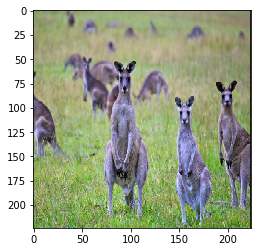

In [39]:
#How about an animal... like a couple kangaroos?
ClassifyImage('Kangaroos.jpg')

Not the most surprising prediction due to how similar wallabies and kangaroos are. Here's a Wallaby for reference.


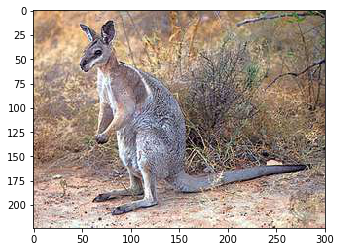

In [45]:
plt.imshow(np.array(PIL.Image.open('Wallaby.jpg')))